#Task
Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

You can download the data [here](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv). The original data is from this data source.

1. Use KMeans to create various customer segments.
  1. Use an Elbow Plot of inertia.
  2. And a plot of Silhouette Scores.
  3. Choose a K based on the results.
2. Submit your notebook below.

In [2]:
# MOUNT DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
#LOAD DATASET
df = pd.read_csv('/content/drive/MyDrive/WEEK 9 - One time RASHAD/cust_seg.csv')
display( df.head() )
print()
display( df.info() )
print()
display( df.describe(include='all') )

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


None

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [5]:
df.duplicated().sum()

0

In [6]:
data = df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']]
data.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [7]:
data['Defaulted'].value_counts(normalize=True)  #Percentage of unique values in 'Defaulted' column.

0.0    0.738571
1.0    0.261429
Name: Defaulted, dtype: float64

In [8]:
data[data['Defaulted'].isna()].head()   #Viewing some rows that have missing data in column 'Defaulted'.

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
5,40,1,23,81,0.998,7.831,NaN,10.9
8,26,1,5,18,0.575,2.215,NaN,15.5
11,34,2,9,40,0.374,0.266,NaN,1.6
13,46,1,6,30,1.415,3.865,NaN,17.6
15,24,1,1,16,0.185,1.287,NaN,9.2


In [9]:
#Imputing 'Defaulted' column with "most_frequent" strategy.  A Value count from
#of the column shows that 0 (has not defaulted) represents near 75% of column
#non-null data.
from sklearn.impute import SimpleImputer

most_freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

new_new = most_freq_imputer.fit_transform(data[['Defaulted']])

temp_df = pd.DataFrame(new_new, columns =['Defaulted'])  #converting imputed column from numpy array to a dataframe and giving the column a name.

data = data.drop(columns = ['Defaulted'])   #dropping 'Defaulted' column original dataframe.

df = pd.concat([data, temp_df], axis=1)   #concatinating (attaching) temp_df to data

In [10]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
Defaulted          0
dtype: int64

In [11]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [12]:
feature_names = scaler.feature_names_in_
scaled_df = scaler.transform(df)

In [13]:
scaled_df = pd.DataFrame(scaled_df)

In [14]:
scaled_df.head()

,0,1,2,3,4,5,6,7
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.576525,-0.523797
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,0.391387,-0.523797
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.597554,1.909138
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.576525,-0.523797
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.442507,-0.523797


In [15]:
scaled_df.columns = feature_names

In [16]:
scaled_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Defaulted
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.576525,-0.523797
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,0.391387,-0.523797
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.597554,1.909138
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.576525,-0.523797
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.442507,-0.523797


In [17]:
def k_mets_silo(scaled_dataframe, df_Feature_1='', df_Feature_2=''):
  internal_df = scaled_dataframe[[df_Feature_1, df_Feature_2]]

  #Create an empty list of inertias and silhouette_score
  silhouette_scores = []

  #Loop through k values between 2 and 10 and store the inertias in the list.
  for k in range(2,11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=7)  
    kmeans.fit(internal_df)  
    silhouette_scores.append(silhouette_score(internal_df, kmeans.labels_))

  #Visualize scores
  plt.plot(range(2,11), silhouette_scores, marker = 'X')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Silhouette Score');
  plt.title(f'Silhouette Score of {df_Feature_1} and {df_Feature_2}')

In [18]:
def k_mets_inertia(scaled_dataframe, df_Feature_1='', df_Feature_2=''):
  internal_df = scaled_dataframe[[df_Feature_1, df_Feature_2]]

  #Create an empty list of inertias and silhouette_score
  inertias = []

  #Loop through k values between 2 and 10 and store the inertias in the list.
  for k in range(2,11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=7)  
    kmeans.fit(internal_df)  
    inertias.append(kmeans.inertia_)

  #Visualize scores
  plt.plot(range(2,11), inertias, marker = 'X')
  plt.xlabel('clusters')
  plt.ylabel('inertia')
  plt.title(f'Inertia of {df_Feature_1} and {df_Feature_2}, ELBOW PLOT')

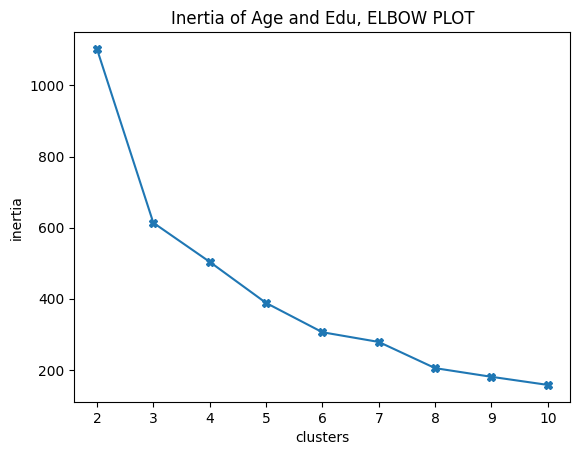

In [19]:
k_mets_inertia(scaled_df,'Age', 'Edu')

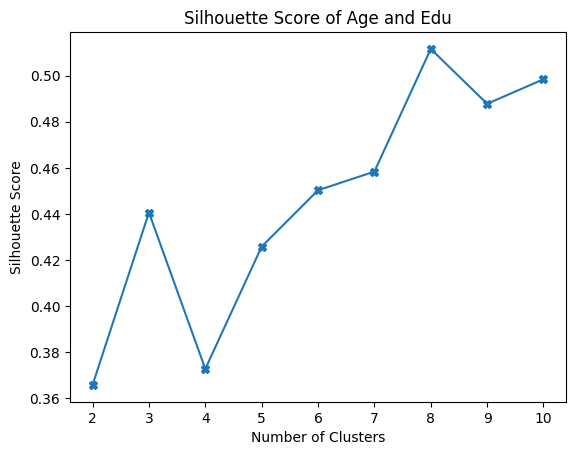

In [20]:
k_mets_silo(scaled_df,'Age', 'Edu')

Elbow Clusters:  3-8

Silhouette Score Clusters:  8

I would choose 8 clusters in this comparison.

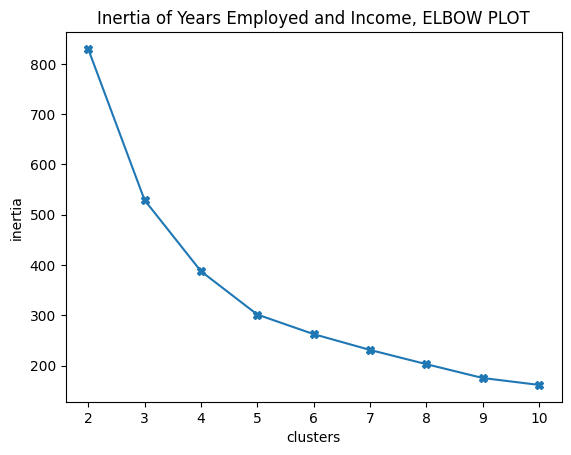

In [21]:
k_mets_inertia(scaled_df,'Years Employed', 'Income')

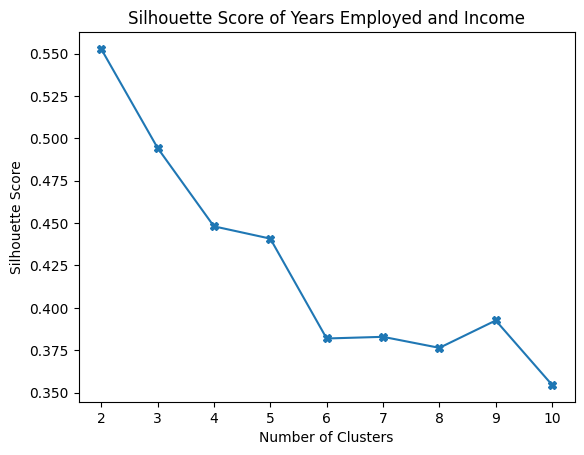

In [22]:
k_mets_silo(scaled_df,'Years Employed', 'Income')

Elbow Clusters: 3-5

Silhouette Score Clusters: 2

I would choose 3 clusters in this comparison.

In [23]:
display(scaled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    float64
 1   Edu              850 non-null    float64
 2   Years Employed   850 non-null    float64
 3   Income           850 non-null    float64
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
 7   Defaulted        850 non-null    float64
dtypes: float64(8)
memory usage: 53.2 KB


None

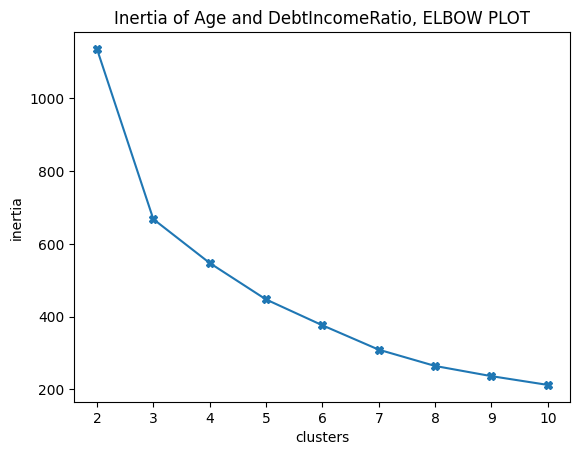

In [24]:
k_mets_inertia(scaled_df,'Age', 'DebtIncomeRatio')

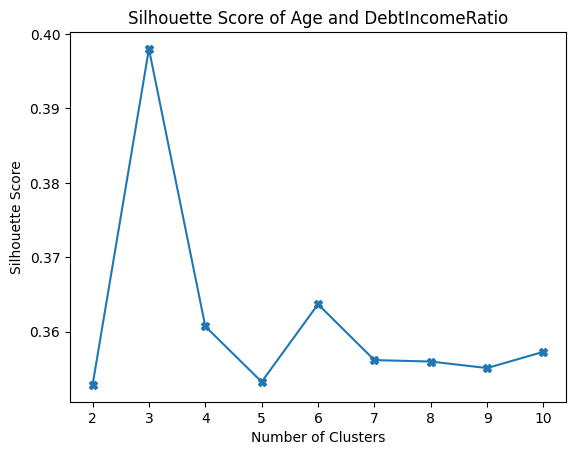

In [25]:
k_mets_silo(scaled_df,'Age', 'DebtIncomeRatio')

Elbow Clusters: 3

Silhouette Score Clusters: 3

I would choose 3 clusters in this comparison.

In [26]:
display(scaled_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    float64
 1   Edu              850 non-null    float64
 2   Years Employed   850 non-null    float64
 3   Income           850 non-null    float64
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
 7   Defaulted        850 non-null    float64
dtypes: float64(8)
memory usage: 53.2 KB


None

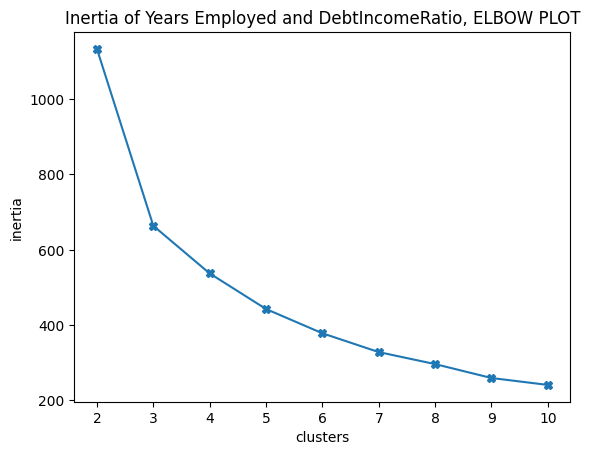

In [27]:
k_mets_inertia(scaled_df,'Years Employed', 'DebtIncomeRatio')

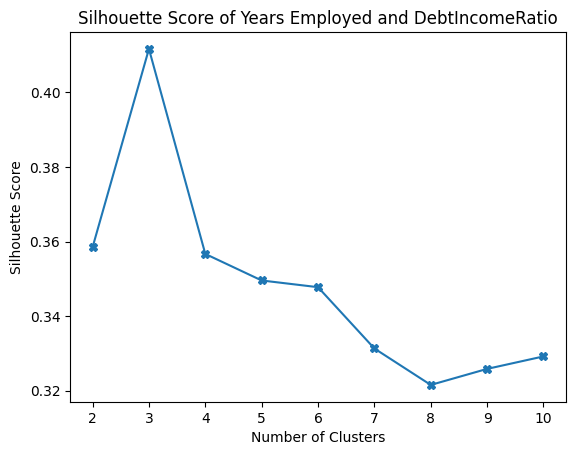

In [28]:
k_mets_silo(scaled_df,'Years Employed', 'DebtIncomeRatio')

Elbow Clusters: 3

Silhouette Score Clusters: 3

I would choose 3 clusters in this comparison.

---
#Final K based choice:  3

I have more examples that work where my cluster choice was three.

---

In [29]:
# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=7)
kmeans.fit(scaled_df)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Defaulted,cluster
0,41,2,6,19,0.124,1.073,6.3,0.0,2
1,47,1,26,100,4.582,8.218,12.8,0.0,1
2,33,2,10,57,6.111,5.802,20.9,1.0,0
3,29,2,4,19,0.681,0.516,6.3,0.0,2
4,47,1,31,253,9.308,8.908,7.2,0.0,1


In [30]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Defaulted
0,0,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,13.994578,0.987952
1,1,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,13.915646,0.129252
2,2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,7.964991,0.000000


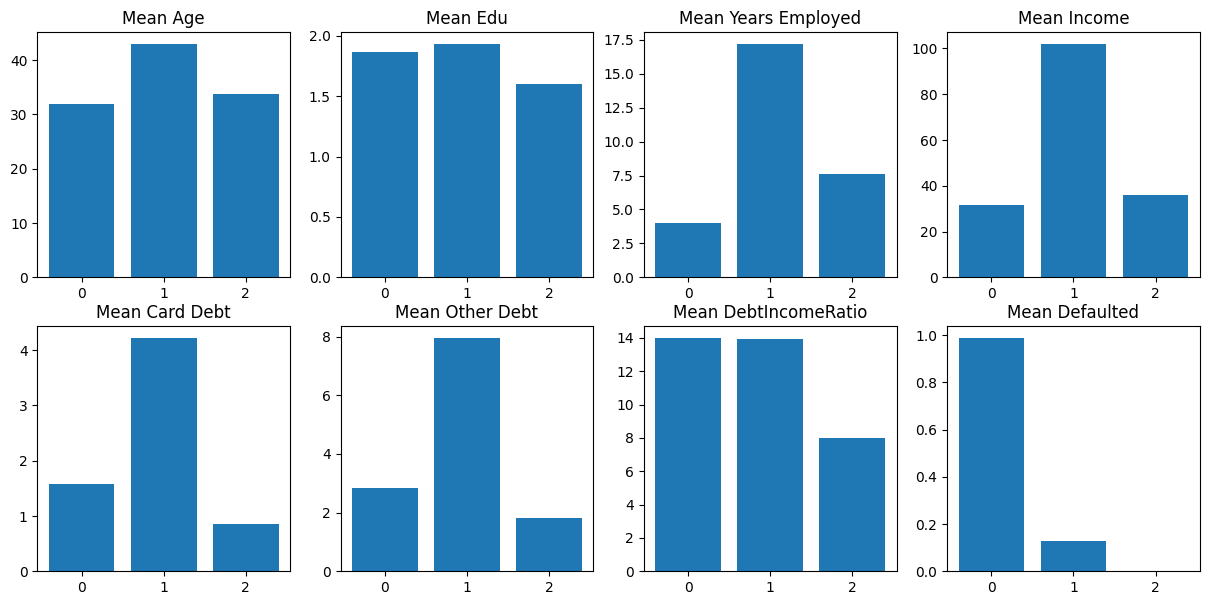

In [31]:
# Visualize means 
fig, axes = plt.subplots(2,4, figsize = (15, 7))
# fig is an array of dimensions 2,4. ???axes.ravel() will flatten it to 12,1 ???
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

#Group 0
Has the highest DebtIncomeRatio, counts of load defaults, and the second highest education.  But because their Card Debt and Other Debt are among the lowest, they seem to not have an interest in getting into debt when spending there money.  This group appears to look after their money and spend it in ways that don't require credit card debit.

#Group 1
This group is ranked the highest in all categories except DEFAULTED.  Because all metrics except one are high for this group, the only thing that can be said about this group is that they comparitivly have a minimal average DEFAULTED score.  Ultimately, it looks like the mostly repay their debits even though they have the highest combined debit of the three groups.  This group is a likely target to offer a credit to.

#Group 2
This group is has the zero DEFAULTED loans and the lowest combined debt (across Card Debt and Other Debt).  This group also has the lowest DEBTINCOMERATIO of all three groups.  This group looks to manage debit very well and has should have the highest potential to repay loans.  Other finanial products should be offered to this group as they appear to demonstrate exceptional money management.  This group should be offered credit.

#Recommendation Summary
Group 1 and Group 2 should be extended offers of credit and loan products.  With Group 2 likely having the potential to properly manage multiple financial products.  Group 2 will yield the best performance of ROI if these customers accept any offered financial products.

---
#DATA CORRELATION HEATMAP
---

In [32]:
scaled_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Defaulted
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.576525,-0.523797
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,0.391387,-0.523797
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.597554,1.909138
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.576525,-0.523797
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.442507,-0.523797


Text(0.5, 1.0, 'Heatmap Correlation')

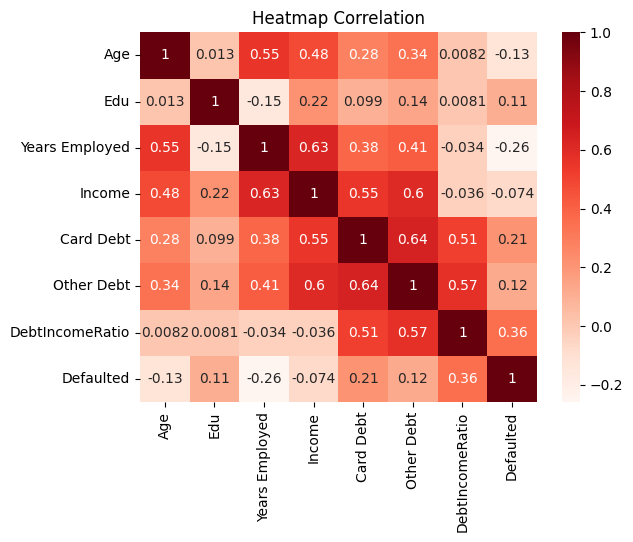

In [40]:
correlation = scaled_df.corr()
import seaborn as sns
sns.heatmap(correlation, cmap = 'Reds', annot = True);
plt.title('Heatmap Correlation')

<Axes: xlabel='Age', ylabel='Years Employed'>

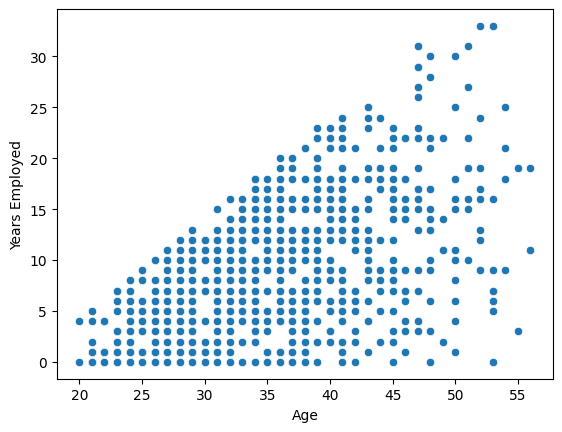

In [43]:
sns.scatterplot(data=df,x='Age',y='Years Employed')

<Axes: xlabel='Income', ylabel='Other Debt'>

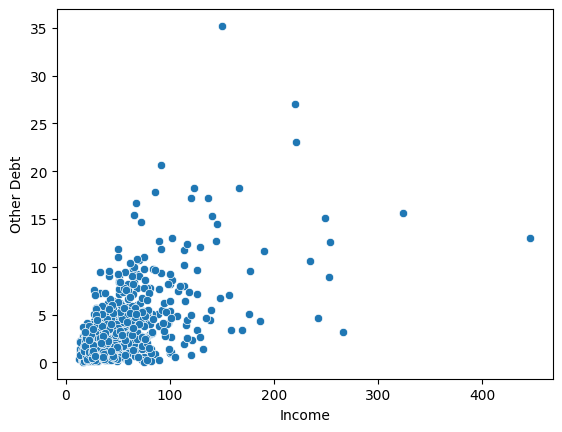

In [44]:
sns.scatterplot(data=df,x='Income',y='Other Debt')

<Axes: xlabel='Card Debt', ylabel='Other Debt'>

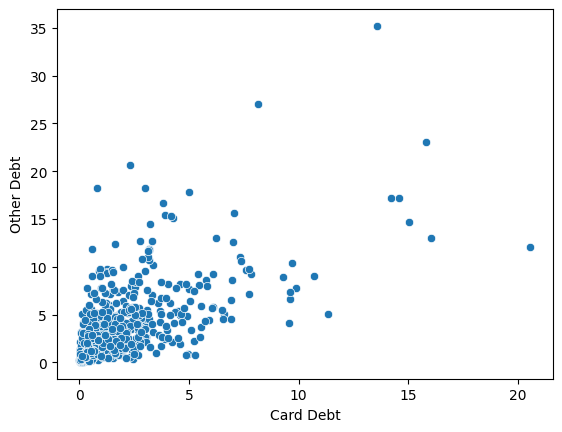

In [47]:
sns.scatterplot(data=df,x='Card Debt',y='Other Debt')

<Axes: xlabel='Years Employed', ylabel='Income'>

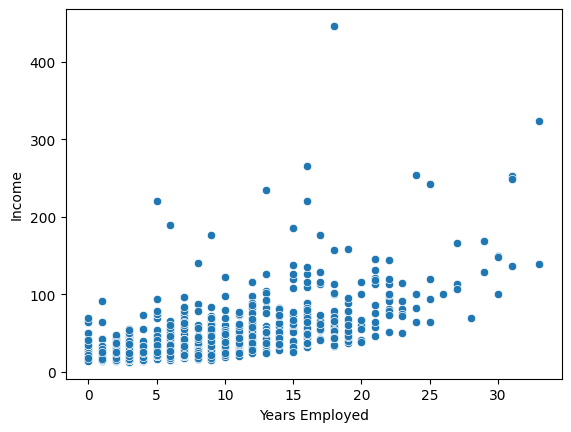

In [49]:
sns.scatterplot(data=df,y='Income',x='Years Employed')